In [2]:
import numpy as np
import pandas as pd
import rebound
import os
import matplotlib.pyplot as plt

In [3]:
pd1 = pd.read_csv('NesvornyAsthalf1_prop_elem_multi_1e8.csv')
pd2 = pd.read_csv('NesvornyAsthalf2_prop_elem_multi_1e8.csv')

pd3 = pd.concat([pd1,pd2],ignore_index=True)
pd3.to_csv('NesvornyAst_prop_elem.csv')

0.0004913122550037777 4.179323837362166
0.006421895307323044 0.3525933969798163


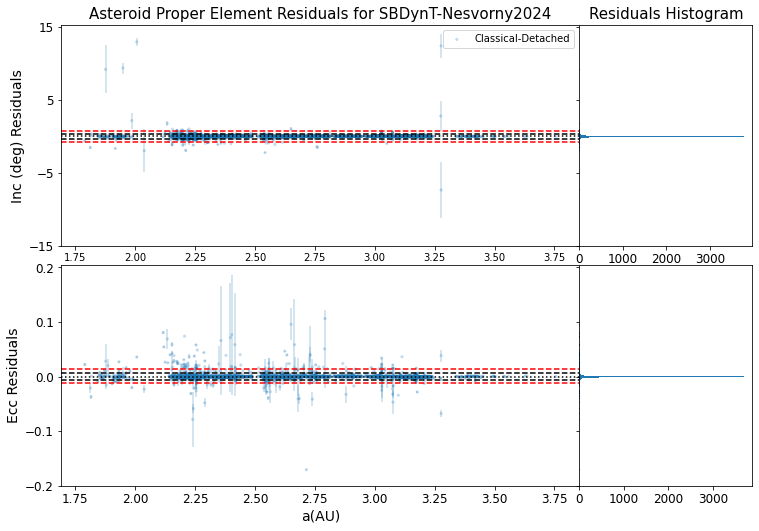

In [60]:
astdys = pd.read_csv('../data_files/NesvornyAst.csv')
TNOs = pd.read_csv('../results/NesvornyAst_prop_elem.csv')
astdys = pd.read_csv('../data_files/NesvornyAsthalf1.csv')
TNOs = pd.read_csv('../results/NesvornyAsthalf1_prop_elem_multi_inv.csv')
TNOs = pd.read_csv('../results/NesvornyAsthalf1_prop_elem_multi_1e8.csv')

#astdys=pd.read_csv('../data_files/Asteroids.csv')
#TNOs = pd.read_csv('../results/Asteroids_prop_elem_multi_pqfilt.csv')

ind1 = np.where(TNOs['PropEcc'] != 0)[0]
ind2 = np.where(TNOs['PropEcc'] < 1)[0]
ind3 = np.where(TNOs['PropSMA'] > 1.8)[0]
ind4 = np.where(TNOs['PropSMA'] < 5.5)[0]

ind = np.intersect1d(ind1,ind2)
ind = np.intersect1d(ind,ind3)
ind = np.intersect1d(ind,ind4)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

fig = plt.figure(figsize=(12,8))
#fig.subplots_adjust(hspace=0)
gs = fig.add_gridspec(2, 2,  width_ratios=(3, 1), height_ratios=(1, 1),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0, hspace=0.085)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0],sharex=ax1)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='x', labelsize=12)
ax1.set_title('Asteroid Proper Element Residuals for SBDynT-Nesvorny2024',fontsize=15)

aste = TNOs['PropEcc']

alp = 0.25
ax1.scatter(astdys['sma'][ind], np.arcsin(TNOs['PropSin(Inc)']-astdys['sini'])[ind]/np.pi*180,s=10,c=colors[0],label='Classical-Detached',alpha=alp,edgecolor='None')
ax1.errorbar(astdys['sma'][ind],np.arcsin(TNOs['PropSin(Inc)']-astdys['sini'])[ind]/np.pi*180,yerr=np.arcsin(astdys['rms_sini'][ind])/np.pi*180,ls="None",c=colors[0],alpha=alp)
num=1212
ax2.scatter(astdys['sma'][ind],(aste-astdys['e'])[ind],s=10,c=colors[0],alpha=alp,edgecolor='None')
#ax2.scatter(astdys['sma'][ind_s],(aste-astdys['e'])[ind_s],s=20,c=colors[4])
#ax2.scatter(astdys['sma'][num],(aste-astdys['e'])[num],s=100,c=colors[4])
#ax1.scatter(astdys['sma'][num],(TNOs['PropSin(Inc)']-astdys['sini'])[num],s=100,c=colors[4])
ax2.errorbar(astdys['sma'][ind],(aste-astdys['e'])[ind],yerr=astdys['rms_e'][ind],ls="None",c=colors[0],alpha=alp)

ax_histy2 = fig.add_subplot(gs[0, 1], sharey=ax1)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax2)

ax_histy2.set_title('Residuals Histogram',fontsize=15)
#ax_histy2.hist((astdys['PropSin(Inc)']-astdys['sinI_x'])[ind],orientation='horizontal',bins=41)
#ax_histy.hist((astdys['PropEcc']-astdys['e_x'])[ind],orientation='horizontal',bins=41)
ax_histy2.hist(np.arcsin(TNOs['PropSin(Inc)']-astdys['sini'])[ind]/np.pi*180,orientation='horizontal',bins=241)
ax_histy.hist((TNOs['PropEcc']-astdys['e'])[ind],orientation='horizontal',bins=241)

ax1.legend()

plt.setp(ax_histy2.get_yticklabels(),visible=False)
plt.setp(ax_histy.get_yticklabels(),visible=False)
ax_histy2.tick_params(axis='x', labelsize=12)
ax_histy.tick_params(axis='x', labelsize=12)

sini_2sig = np.average(((np.arcsin(TNOs['PropSin(Inc)']-astdys['sini'])[ind])/np.pi*180)**2, weights=np.arcsin(astdys['rms_sini'][ind])/np.pi*180)
e_2sig = np.average((TNOs['PropEcc']-astdys['e'])[ind]**2, weights=astdys['rms_e'][ind])
print(e_2sig/2,sini_2sig/2)

sini_2sig = (np.arcsin(TNOs['PropSin(Inc)']-astdys['sini'])[ind]/np.pi*180).std()*2
e_2sig = (TNOs['PropEcc']-astdys['e'])[ind].std()*2

sini_2sig1 = (np.arcsin(TNOs['PropSin(Inc)']-astdys['sini'])[ind]/np.pi*180).std()*2

sini_2sig1 = ((np.arcsin(TNOs['PropSin(Inc)']-astdys['sini'])/astdys['rms_sini'])[ind]/np.pi*180).std()*2
e_2sig1 = (TNOs['PropEcc']-astdys['e'])[ind].std()*2
print(e_2sig/2,sini_2sig/2)

mean_sini = np.mean(np.arcsin(TNOs['PropSin(Inc)']-astdys['sini'])[ind]/np.pi*180)
mean_e = np.mean((TNOs['PropEcc']-astdys['e'])[ind])


ax1.axhline(y = sini_2sig+mean_sini, color = 'r', linestyle = 'dashed')
ax1.axhline(y = -sini_2sig+mean_sini, color = 'r', linestyle = 'dashed') 

ax2.axhline(y = e_2sig+mean_e, color = 'r', linestyle = 'dashed')
ax2.axhline(y = -e_2sig+mean_e, color = 'r', linestyle = 'dashed') 

ax1.axhline(y = sini_2sig/2+mean_sini, color = 'k', linestyle = 'dashed')
ax1.axhline(y = -sini_2sig/2+mean_sini, color = 'k', linestyle = 'dashed') 

ax2.axhline(y = e_2sig/2+mean_e, color = 'k', linestyle = 'dashed')
ax2.axhline(y = -e_2sig/2+mean_e, color = 'k', linestyle = 'dashed') 


ax1.axhline(y = 0, color = 'k', linestyle = 'dotted') 
ax2.axhline(y = 0, color = 'k', linestyle = 'dotted') 

ax2.set_xlabel('a(AU)',fontsize=14)
ax1.set_ylabel('Inc (deg) Residuals',fontsize=14)
ax2.set_ylabel('Ecc Residuals',fontsize=14)
#ax1.set_xlim(29,61)
#ax1.set_ylim(-6,7)
#ax2.set_ylim(-0.001,0.001)
#ax1.set_ylim(-0.001,0.001)
#ax2.set_ylim(-0.04,0.04)
#ax1.set_ylim(-1.75,1.75)

#ax2.set_ylim(-e_2sig*3,e_2sig*3)
#ax1.set_ylim(-sini_2sig*3,sini_2sig*3)

ax1.set_yticks(ax1.get_yticks()[::2])
ax2.set_yticks(ax2.get_yticks()[::2])
#plt.setp(ax1.get_xticklabels(), visible=False)
#plt.setp(ax_histy2.get_xticklabels(), visible=False)
#ax[1].title('SBDynT\'s Proper Sin(Inclination)')
plt.savefig('residuals_nesvorny.png')
plt.show()




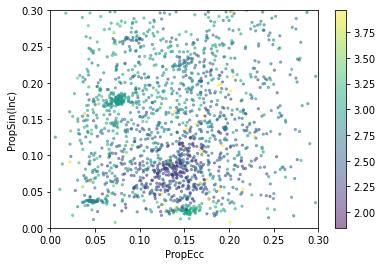

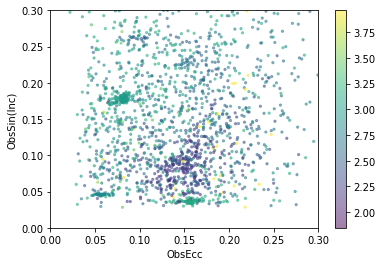

In [57]:
plt.scatter(TNOs['PropEcc'][ind],TNOs['PropSin(Inc)'][ind],s=5,alpha=0.5,c=TNOs['PropSMA'][ind])
plt.colorbar()
plt.xlabel('PropEcc')
plt.ylabel('PropSin(Inc)')
plt.xlim(0,0.3)
plt.ylim(0,0.3)
plt.show()
plt.scatter(TNOs['ObsEcc'][ind],TNOs['ObsSin(Inc)'][ind],s=5,alpha=0.5,c=TNOs['PropSMA'][ind])
plt.xlabel('ObsEcc')
plt.colorbar()
plt.ylabel('ObsSin(Inc)')
plt.xlim(0,0.3)
plt.ylim(0,0.3)
plt.show()

0.0001870870503190306 0.0010343778629412442
0.000627094947923376 0.46880933891815707
0.01134881649261502 0.6345453519687987


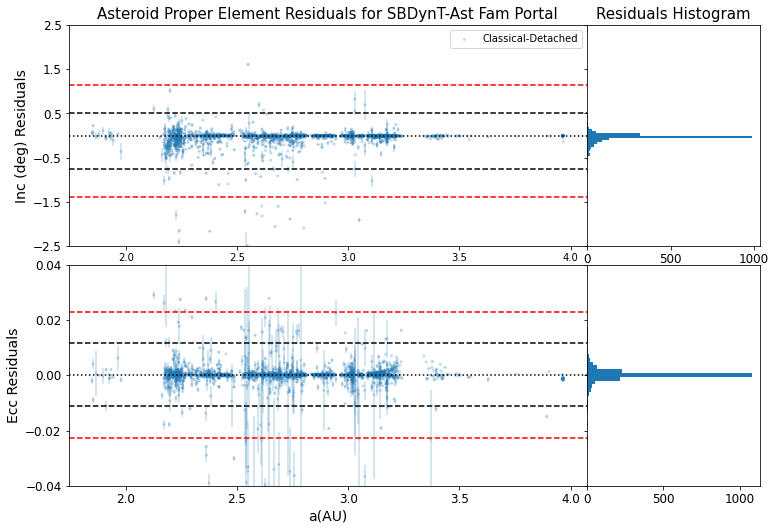

In [52]:
astdys=pd.read_csv('../data_files/Asteroids.csv')
TNOs = pd.read_csv('../results/Asteroids_prop_elem_multi_pqfilt.csv')
sig = pd.read_csv('../data_files/Asteroids_sig.csv')

ind1 = np.where(TNOs['PropEcc'] != 0)[0]
ind2 = np.where(TNOs['PropEcc'] < 1)[0]
ind3 = np.where(TNOs['PropSMA'] > 1.8)[0]
ind4 = np.where(TNOs['PropSMA'] < 5.5)[0]

ind = np.intersect1d(ind1,ind2)
ind = np.intersect1d(ind,ind3)
ind = np.intersect1d(ind,ind4)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

fig = plt.figure(figsize=(12,8))
#fig.subplots_adjust(hspace=0)
gs = fig.add_gridspec(2, 2,  width_ratios=(3, 1), height_ratios=(1, 1),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0, hspace=0.085)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0],sharex=ax1)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='x', labelsize=12)
ax1.set_title('Asteroid Proper Element Residuals for SBDynT-Ast Fam Portal',fontsize=15)

aste = TNOs['PropEcc']

alp = 0.25
ax1.scatter(astdys['a(AU)'][ind], np.arcsin(TNOs['PropSin(Inc)']-astdys['sinI'])[ind]/np.pi*180,s=10,c=colors[0],label='Classical-Detached',alpha=alp,edgecolor='None')
ax1.errorbar(astdys['a(AU)'][ind],np.arcsin(TNOs['PropSin(Inc)']-astdys['sinI'])[ind]/np.pi*180,yerr=np.arcsin(sig['sinI_sig'][ind])/np.pi*180,ls="None",c=colors[0],alpha=alp)
num=1212
ax2.scatter(astdys['a(AU)'][ind],(aste-astdys['e'])[ind],s=10,c=colors[0],alpha=alp,edgecolor='None')
#ax2.scatter(astdys['sma'][ind_s],(aste-astdys['e'])[ind_s],s=20,c=colors[4])
#ax2.scatter(astdys['sma'][num],(aste-astdys['e'])[num],s=100,c=colors[4])
#ax1.scatter(astdys['sma'][num],(TNOs['PropSin(Inc)']-astdys['sini'])[num],s=100,c=colors[4])
ax2.errorbar(astdys['a(AU)'][ind],(aste-astdys['e'])[ind],yerr=sig['e_sig'][ind],ls="None",c=colors[0],alpha=alp)

ax_histy2 = fig.add_subplot(gs[0, 1], sharey=ax1)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax2)

ax_histy2.set_title('Residuals Histogram',fontsize=15)
#ax_histy2.hist((astdys['PropSin(Inc)']-astdys['sinI_x'])[ind],orientation='horizontal',bins=41)
#ax_histy.hist((astdys['PropEcc']-astdys['e_x'])[ind],orientation='horizontal',bins=41)
ax_histy2.hist(np.arcsin(TNOs['PropSin(Inc)']-astdys['sinI'])[ind]/np.pi*180,orientation='horizontal',bins=241)
ax_histy.hist((TNOs['PropEcc']-astdys['e'])[ind],orientation='horizontal',bins=241)

ax1.legend()

plt.setp(ax_histy2.get_yticklabels(),visible=False)
plt.setp(ax_histy.get_yticklabels(),visible=False)
ax_histy2.tick_params(axis='x', labelsize=12)
ax_histy.tick_params(axis='x', labelsize=12)


sini_2sig = (np.arcsin(sig['sinI_sig'][ind]*(TNOs['PropSin(Inc)']-astdys['sinI']))[ind]/np.pi*180).std()*2/np.sqrt(np.sum(sig['sinI_sig'][ind]))
e_2sig = (sig['e_sig'][ind]*(TNOs['PropEcc']-astdys['e'])[ind]).std()*2/np.sqrt(np.sum(sig['e_sig'][ind]))
print(e_2sig/2,sini_2sig/2)

sini_2sig = np.average(((np.arcsin(TNOs['PropSin(Inc)']-astdys['sinI'])[ind])/np.pi*180)**2, weights=np.arcsin(sig['sinI_sig'][ind])/np.pi*180)
e_2sig = np.average((TNOs['PropEcc']-astdys['e'])[ind]**2, weights=sig['e_sig'][ind])
print(e_2sig/2,sini_2sig/2)


sini_2sig = (np.arcsin(TNOs['PropSin(Inc)']-astdys['sinI'])[ind]/np.pi*180).std()*2
e_2sig = (TNOs['PropEcc']-astdys['e'])[ind].std()*2
print(e_2sig/2,sini_2sig/2)

mean_sini = np.mean(np.arcsin(TNOs['PropSin(Inc)']-astdys['sinI'])[ind]/np.pi*180)
mean_e = np.mean((TNOs['PropEcc']-astdys['e'])[ind])


ax1.axhline(y = sini_2sig+mean_sini, color = 'r', linestyle = 'dashed')
ax1.axhline(y = -sini_2sig+mean_sini, color = 'r', linestyle = 'dashed') 

ax2.axhline(y = e_2sig+mean_e, color = 'r', linestyle = 'dashed')
ax2.axhline(y = -e_2sig+mean_e, color = 'r', linestyle = 'dashed') 

ax1.axhline(y = sini_2sig/2+mean_sini, color = 'k', linestyle = 'dashed')
ax1.axhline(y = -sini_2sig/2+mean_sini, color = 'k', linestyle = 'dashed') 

ax2.axhline(y = e_2sig/2+mean_e, color = 'k', linestyle = 'dashed')
ax2.axhline(y = -e_2sig/2+mean_e, color = 'k', linestyle = 'dashed') 


ax1.axhline(y = 0, color = 'k', linestyle = 'dotted') 
ax2.axhline(y = 0, color = 'k', linestyle = 'dotted') 

ax2.set_xlabel('a(AU)',fontsize=14)
ax1.set_ylabel('Inc (deg) Residuals',fontsize=14)
ax2.set_ylabel('Ecc Residuals',fontsize=14)
#ax1.set_xlim(29,61)
#ax1.set_ylim(-6,7)
#ax2.set_ylim(-0.001,0.001)
#ax1.set_ylim(-0.001,0.001)
ax2.set_ylim(-0.04,0.04)
ax1.set_ylim(-1.75,1.75)

ax2.set_ylim(-e_2sig1*3,e_2sig1*3)
ax1.set_ylim(-sini_2sig1*3,sini_2sig1*3)

ax1.set_yticks(ax1.get_yticks()[::2])
ax2.set_yticks(ax2.get_yticks()[::2])
#plt.setp(ax1.get_xticklabels(), visible=False)
#plt.setp(ax_histy2.get_xticklabels(), visible=False)
#ax[1].title('SBDynT\'s Proper Sin(Inclination)')
plt.savefig('residuals_astfam.png')
plt.show()




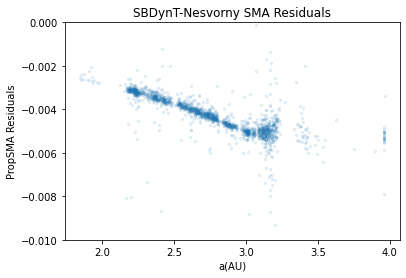

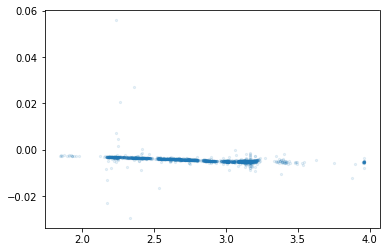

In [55]:
plt.scatter(TNOs['PropSMA'][ind],(TNOs['PropSMA']-astdys['a(AU)'])[ind],alpha=0.1,s=5)
plt.xlabel('a(AU)')
plt.ylabel('PropSMA Residuals')
plt.title('SBDynT-Nesvorny SMA Residuals')
plt.ylim(-0.01,0)
plt.show()
plt.scatter(TNOs['PropSMA'][ind],(TNOs['PropSMA']-astdys['a(AU)'])[ind],alpha=0.1,s=5)


In [19]:
ind11 = np.where(abs(TNOs['PropEcc']-astdys['e']) > 0.025)[0]
ind21 = np.where(abs(TNOs['PropEcc']-astdys['e']) < 0.1)[0]
#ind21 = np.where(abs(TNOs['PropEcc']-aste) > 0.10)[0]
ind11 = np.where(abs(TNOs['PropSin(Inc)']-astdys['sini']) > 0.002)[0]
ind21 = np.where(abs(TNOs['PropSin(Inc)']-astdys['sini']) < 0.004)[0]
ind31 = np.where(TNOs['PropSMA'] > 2.1)[0]
ind41 = np.where(TNOs['PropSMA'] < 2.2)[0]
#ind51 = np.where(astdys['e_y'] < 0.005)[0]

#ind_s = np.intersect1d(ind11,ind21)
ind_s = np.intersect1d(ind11,ind31)
ind_s = np.intersect1d(ind_s,ind21)
#print(ind_s)
ind_s = np.intersect1d(ind_s,ind41)
#ind_s = np.intersect1d(ind_s,class_ind)
#ind_s = np.intersect1d(ind_s,ind51)

print(ind_s)
#print(ind11)

#print(ind31)
#print(ind41)
num=[1520,1563,1611,1616]
print(TNOs.iloc[num])
print(astdys.iloc[num])
print(TNOs['PropEcc'][num]-astdys['e'][num])
print(TNOs['PropSin(Inc)'][num]-astdys['sini'][num])

[ 251  267  446 1125 1520 1563 1611 1616 1617 1763 1765 1901 1909 1911
 1939 1995 2181 2182 2332 2449 2598 2824 2838 2986 3113 3142 3150 3221
 3222 3227 3503 3513 3523 3548 3583 3646 3664 3681 3886 4215 4332 4387
 4460 4575 4629 4780 4782 4987 5071 5105 5315 5317 5347 5525 5650 5683
 5716 5940 5948 6101 6102 6222 6292 6342 6397 6436 6535 6537 6628 6834
 6857 6864 6889 6901 6939 6954 6972 6985 7447 7499 7511 7581 7583 7770
 7867 7896 7905 7906 7914 8019 8300 8319 8350 8410 8646 8757 8813 8814
 8840 8864 8884 9014 9071 9074 9520 9530]
      Unnamed: 0  Unnamed: 0.1  Objname    ObsSMA    ObsEcc  ObsSin(Inc)  \
1520        1520          1520     1563  2.188682  0.165022     0.103198   
1563        1563          1563     1610  2.199363  0.166954     0.049904   
1611        1611          1611     1661  2.180811  0.126905     0.064526   
1616        1616          1616     1666  2.182478  0.127792     0.065277   

         Obs_h   PropSMA   PropEcc  PropSin(Inc)  ...  4_6PE_sinI   4_6PE_h  \
1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.013932987575243451 0.7448137585554857


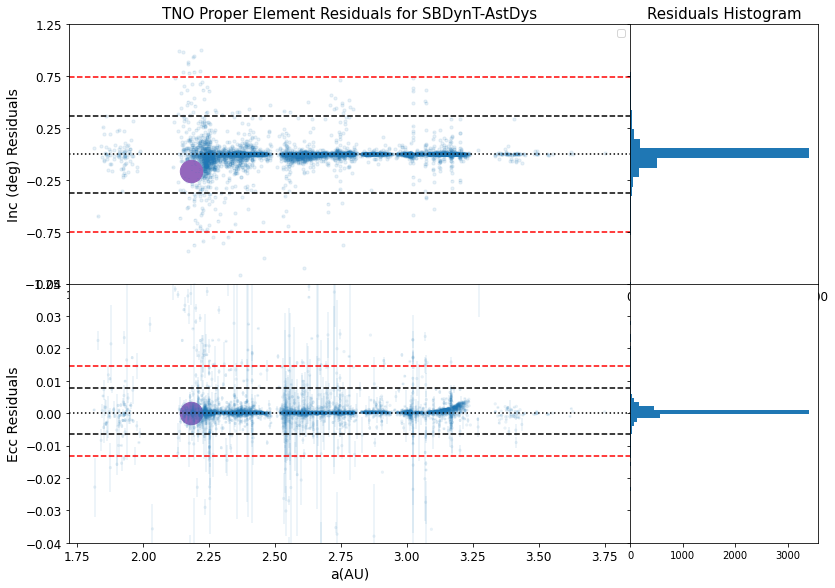

In [41]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

astdys = pd.read_csv('../data_files/NesvornyAsthalf1.csv')
TNOs = pd.read_csv('../results/NesvornyAsthalf1_prop_elem_multi_inv.csv')
ind1 = np.where(TNOs['PropEcc'] != 0)[0]
ind2 = np.where(TNOs['PropEcc'] < 1)[0]
ind3 = np.where(TNOs['PropSMA'] > 1.8)[0]
ind4 = np.where(TNOs['PropSMA'] < 5.5)[0]

ind = np.intersect1d(ind1,ind2)
ind = np.intersect1d(ind,ind3)
ind = np.intersect1d(ind,ind4)
#astdys=astdys.iloc[]

fig = plt.figure(figsize=(13,9))
#fig.subplots_adjust(hspace=0)
gs = fig.add_gridspec(2, 2,  width_ratios=(3, 1), height_ratios=(1, 1),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0, hspace=0)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0],sharex=ax1)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='x', labelsize=12)
ax1.set_title('TNO Proper Element Residuals for SBDynT-AstDys',fontsize=15)

aste = TNOs['PropEcc']
'''
#ax1.scatter(catalog['a(AU)'].values[ind],(TNOs['PropSin(Inc)'].values-catalog['sinI'].values)[ind],s=5)
#ax1.errorbar(catalog['a(AU)'].values[ind],(TNOs['PropSin(Inc)'].values-catalog['sinI'].values)[ind],yerr=sigs['sinI'].values[ind],ls="None")
#ax2.scatter(catalog['a(AU)'].values[ind],(TNOs['PropEcc'].values-catalog['e'].values)[ind],s=5)
#ax2.errorbar(catalog['a(AU)'].values[ind],(TNOs['PropEcc'].values-catalog['e'].values)[ind],yerr=sigs['e'].values[ind],ls="None")
#ax_histy.hist((TNOs['PropEcc'].values-catalog['e'].values)[ind],orientation='horizontal',bins=29)
#ax_histy2.hist((TNOs['PropSin(Inc)'].values-catalog['sinI'].values)[ind],orientation='horizontal',bins=29)

'''
alp=0.1
ax1.scatter(TNOs['PropSMA'][ind],np.arcsin(TNOs['PropSin(Inc)']-astdys['sini'])[ind]/np.pi*180,alpha=alp,s=10)
ax1.errorbar(TNOs['PropSMA'][ind],np.arcsin(TNOs['PropSin(Inc)']-astdys['sini'])[ind]/np.pi*180,yerr=astdys['rms_sini'][ind],ls="None",c=colors[0],alpha=alp)
ax1.scatter(TNOs['PropSMA'][num],np.arcsin(TNOs['PropSin(Inc)']-astdys['sini'])[num]/np.pi*180,s=500,c=colors[4])

num=1616
ax2.scatter(TNOs['PropSMA'][ind],(aste-astdys['e'])[ind],s=10,c=colors[0],alpha=alp,edgecolor='None')
ax2.scatter(TNOs['PropSMA'][num],(TNOs['PropEcc']-aste)[num],s=500,c=colors[4])
ax2.errorbar(TNOs['PropSMA'][ind],(aste-astdys['e'])[ind],yerr=astdys['rms_e'][ind],ls="None",c=colors[0],alpha=alp)

'''
ax2.scatter(astdys['a(AU)'][scatt_ind],(astdys['PropEcc']-aste)[scatt_ind],s=5,c=colors[1],alpha=0.5)
ax2.errorbar(astdys['a(AU)'].iloc[scatt_ind],(astdys['PropEcc']-aste).iloc[scatt_ind],yerr=astdys['e_y'].iloc[scatt_ind],ls="None",c=colors[1],alpha=0.5)
ax1.scatter(astdys['a(AU)'][scatt_ind],(astdys['PropSin(Inc)']-astdys['sinI_x'])[scatt_ind],s=5,c=colors[1],label='Scattered',alpha=0.5)
ax1.errorbar(astdys['a(AU)'].iloc[scatt_ind],(astdys['PropSin(Inc)']-astdys['sinI_x']).iloc[scatt_ind],yerr=astdys['sinI_y'].iloc[scatt_ind],ls="None",c=colors[1],alpha=0.5)

#ax2.scatter(astdys['a(AU)'][detach_ind],(astdys['PropEcc']-aste)[detach_ind],s=5,c=colors[0])
#ax2.errorbar(astdys['a(AU)'].iloc[detach_ind],(astdys['PropEcc']-aste).iloc[detach_ind],yerr=astdys['e_y'].iloc[detach_ind],ls="None",c=colors[0])
#ax1.scatter(astdys['a(AU)'][detach_ind],(astdys['PropSin(Inc)']-astdys['sinI_x'])[detach_ind],s=5,c=colors[0])
#ax1.errorbar(astdys['a(AU)'].iloc[detach_ind],(astdys['PropSin(Inc)']-astdys['sinI_x']).iloc[detach_ind],yerr=astdys['sinI_y'].iloc[detach_ind],ls="None",c=colors[0])

ax2.scatter(astdys['a(AU)'][nres_ind],(astdys['PropEcc']-aste)[nres_ind],s=5,c=colors[2],alpha=0.5)
ax2.errorbar(astdys['a(AU)'].iloc[nres_ind],(astdys['PropEcc']-aste).iloc[nres_ind],yerr=astdys['e_y'].iloc[nres_ind],ls="None",c=colors[2],alpha=0.5)
ax1.scatter(astdys['a(AU)'][nres_ind],(astdys['PropSin(Inc)']-astdys['sinI_x'])[nres_ind],s=5,c=colors[2],label='Resonant',alpha=0.5)
ax1.errorbar(astdys['a(AU)'].iloc[nres_ind],(astdys['PropSin(Inc)']-astdys['sinI_x']).iloc[nres_ind],yerr=astdys['sinI_y'].iloc[nres_ind],ls="None",c=colors[2],alpha=0.5)
#'''

ax_histy2 = fig.add_subplot(gs[0, 1], sharey=ax1)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax2)

ax_histy2.set_title('Residuals Histogram',fontsize=15)
#ax_histy2.hist((astdys['PropSin(Inc)']-astdys['sinI_x'])[ind],orientation='horizontal',bins=41)
#ax_histy.hist((astdys['PropEcc']-astdys['e_x'])[ind],orientation='horizontal',bins=41)
ax_histy2.hist(np.arcsin(TNOs['PropSin(Inc)']-astdys['sini'])[ind]/np.pi*180,orientation='horizontal',bins=241)
ax_histy.hist((TNOs['PropEcc']-astdys['e'])[ind],orientation='horizontal',bins=241)

ax1.legend()

plt.setp(ax_histy2.get_yticklabels(),visible=False)
plt.setp(ax_histy.get_yticklabels(),visible=False)
ax_histy2.tick_params(axis='x', labelsize=12)

sini_2sig = (np.arcsin(TNOs['PropSin(Inc)']-astdys['sini'])[ind]/np.pi*180).std()*2
e_2sig = (TNOs['PropEcc']-astdys['e'])[ind].std()*2

mean_sini = np.mean(np.arcsin(TNOs['PropSin(Inc)']-astdys['sini'])[ind]/np.pi*180)
mean_e = np.mean((TNOs['PropEcc']-astdys['e'])[ind])

print(e_2sig,sini_2sig)
ax1.axhline(y = sini_2sig+mean_sini, color = 'r', linestyle = 'dashed')
ax1.axhline(y = -sini_2sig+mean_sini, color = 'r', linestyle = 'dashed') 

ax2.axhline(y = e_2sig+mean_e, color = 'r', linestyle = 'dashed')
ax2.axhline(y = -e_2sig+mean_e, color = 'r', linestyle = 'dashed') 

ax1.axhline(y = sini_2sig/2+mean_sini, color = 'k', linestyle = 'dashed')
ax1.axhline(y = -sini_2sig/2+mean_sini, color = 'k', linestyle = 'dashed') 

ax2.axhline(y = e_2sig/2+mean_e, color = 'k', linestyle = 'dashed')
ax2.axhline(y = -e_2sig/2+mean_e, color = 'k', linestyle = 'dashed') 


ax1.axhline(y = 0, color = 'k', linestyle = 'dotted') 
ax2.axhline(y = 0, color = 'k', linestyle = 'dotted') 

ax2.set_xlabel('a(AU)',fontsize=14)
ax1.set_ylabel('Inc (deg) Residuals',fontsize=14)
ax2.set_ylabel('Ecc Residuals',fontsize=14)
#ax1.set_xlim(29,61)
#ax1.set_ylim(-6,7)
#ax2.set_ylim(-0.15,0.1)

ax2.set_ylim(-0.04,0.04)
ax1.set_ylim(-1.04,1.04)

ax1.set_yticks(ax1.get_yticks()[::2])
#ax[1].title('SBDynT\'s Proper Sin(Inclination)')
plt.savefig('residuals.png')
plt.show()




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.015590905203601768 0.7390922494737542


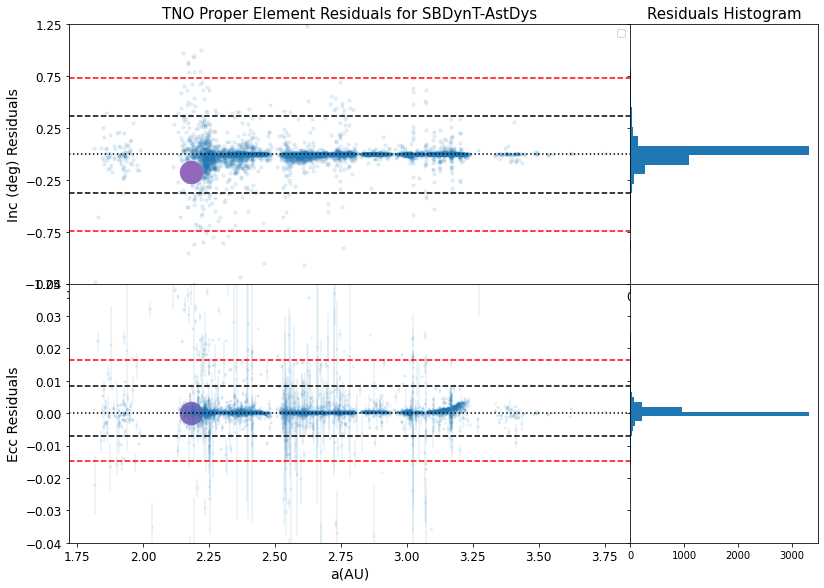

In [42]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

astdys = pd.read_csv('../data_files/NesvornyAsthalf1.csv')
TNOs = pd.read_csv('../results/NesvornyAsthalf1_prop_elem_multi_yhk.csv')
ind1 = np.where(TNOs['PropEcc'] != 0)[0]
ind2 = np.where(TNOs['PropEcc'] < 1)[0]
ind3 = np.where(TNOs['PropSMA'] > 1.8)[0]
ind4 = np.where(TNOs['PropSMA'] < 5.5)[0]

ind = np.intersect1d(ind1,ind2)
ind = np.intersect1d(ind,ind3)
ind = np.intersect1d(ind,ind4)
#astdys=astdys.iloc[]

fig = plt.figure(figsize=(13,9))
#fig.subplots_adjust(hspace=0)
gs = fig.add_gridspec(2, 2,  width_ratios=(3, 1), height_ratios=(1, 1),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0, hspace=0)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0],sharex=ax1)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='x', labelsize=12)
ax1.set_title('TNO Proper Element Residuals for SBDynT-AstDys',fontsize=15)

aste = TNOs['PropEcc']
'''
#ax1.scatter(catalog['a(AU)'].values[ind],(TNOs['PropSin(Inc)'].values-catalog['sinI'].values)[ind],s=5)
#ax1.errorbar(catalog['a(AU)'].values[ind],(TNOs['PropSin(Inc)'].values-catalog['sinI'].values)[ind],yerr=sigs['sinI'].values[ind],ls="None")
#ax2.scatter(catalog['a(AU)'].values[ind],(TNOs['PropEcc'].values-catalog['e'].values)[ind],s=5)
#ax2.errorbar(catalog['a(AU)'].values[ind],(TNOs['PropEcc'].values-catalog['e'].values)[ind],yerr=sigs['e'].values[ind],ls="None")
#ax_histy.hist((TNOs['PropEcc'].values-catalog['e'].values)[ind],orientation='horizontal',bins=29)
#ax_histy2.hist((TNOs['PropSin(Inc)'].values-catalog['sinI'].values)[ind],orientation='horizontal',bins=29)

'''
alp=0.1
ax1.scatter(TNOs['PropSMA'][ind],np.arcsin(TNOs['PropSin(Inc)']-astdys['sini'])[ind]/np.pi*180,alpha=alp,s=10)
ax1.errorbar(TNOs['PropSMA'][ind],np.arcsin(TNOs['PropSin(Inc)']-astdys['sini'])[ind]/np.pi*180,yerr=astdys['rms_sini'][ind],ls="None",c=colors[0],alpha=alp)
ax1.scatter(TNOs['PropSMA'][num],np.arcsin(TNOs['PropSin(Inc)']-astdys['sini'])[num]/np.pi*180,s=500,c=colors[4])

num=1616
ax2.scatter(TNOs['PropSMA'][ind],(aste-astdys['e'])[ind],s=10,c=colors[0],alpha=alp,edgecolor='None')
ax2.scatter(TNOs['PropSMA'][num],(TNOs['PropEcc']-aste)[num],s=500,c=colors[4])
ax2.errorbar(TNOs['PropSMA'][ind],(aste-astdys['e'])[ind],yerr=astdys['rms_e'][ind],ls="None",c=colors[0],alpha=alp)

'''
ax2.scatter(astdys['a(AU)'][scatt_ind],(astdys['PropEcc']-aste)[scatt_ind],s=5,c=colors[1],alpha=0.5)
ax2.errorbar(astdys['a(AU)'].iloc[scatt_ind],(astdys['PropEcc']-aste).iloc[scatt_ind],yerr=astdys['e_y'].iloc[scatt_ind],ls="None",c=colors[1],alpha=0.5)
ax1.scatter(astdys['a(AU)'][scatt_ind],(astdys['PropSin(Inc)']-astdys['sinI_x'])[scatt_ind],s=5,c=colors[1],label='Scattered',alpha=0.5)
ax1.errorbar(astdys['a(AU)'].iloc[scatt_ind],(astdys['PropSin(Inc)']-astdys['sinI_x']).iloc[scatt_ind],yerr=astdys['sinI_y'].iloc[scatt_ind],ls="None",c=colors[1],alpha=0.5)

#ax2.scatter(astdys['a(AU)'][detach_ind],(astdys['PropEcc']-aste)[detach_ind],s=5,c=colors[0])
#ax2.errorbar(astdys['a(AU)'].iloc[detach_ind],(astdys['PropEcc']-aste).iloc[detach_ind],yerr=astdys['e_y'].iloc[detach_ind],ls="None",c=colors[0])
#ax1.scatter(astdys['a(AU)'][detach_ind],(astdys['PropSin(Inc)']-astdys['sinI_x'])[detach_ind],s=5,c=colors[0])
#ax1.errorbar(astdys['a(AU)'].iloc[detach_ind],(astdys['PropSin(Inc)']-astdys['sinI_x']).iloc[detach_ind],yerr=astdys['sinI_y'].iloc[detach_ind],ls="None",c=colors[0])

ax2.scatter(astdys['a(AU)'][nres_ind],(astdys['PropEcc']-aste)[nres_ind],s=5,c=colors[2],alpha=0.5)
ax2.errorbar(astdys['a(AU)'].iloc[nres_ind],(astdys['PropEcc']-aste).iloc[nres_ind],yerr=astdys['e_y'].iloc[nres_ind],ls="None",c=colors[2],alpha=0.5)
ax1.scatter(astdys['a(AU)'][nres_ind],(astdys['PropSin(Inc)']-astdys['sinI_x'])[nres_ind],s=5,c=colors[2],label='Resonant',alpha=0.5)
ax1.errorbar(astdys['a(AU)'].iloc[nres_ind],(astdys['PropSin(Inc)']-astdys['sinI_x']).iloc[nres_ind],yerr=astdys['sinI_y'].iloc[nres_ind],ls="None",c=colors[2],alpha=0.5)
#'''

ax_histy2 = fig.add_subplot(gs[0, 1], sharey=ax1)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax2)

ax_histy2.set_title('Residuals Histogram',fontsize=15)
#ax_histy2.hist((astdys['PropSin(Inc)']-astdys['sinI_x'])[ind],orientation='horizontal',bins=41)
#ax_histy.hist((astdys['PropEcc']-astdys['e_x'])[ind],orientation='horizontal',bins=41)
ax_histy2.hist(np.arcsin(TNOs['PropSin(Inc)']-astdys['sini'])[ind]/np.pi*180,orientation='horizontal',bins=241)
ax_histy.hist((TNOs['PropEcc']-astdys['e'])[ind],orientation='horizontal',bins=241)

ax1.legend()

plt.setp(ax_histy2.get_yticklabels(),visible=False)
plt.setp(ax_histy.get_yticklabels(),visible=False)
ax_histy2.tick_params(axis='x', labelsize=12)

sini_2sig = (np.arcsin(TNOs['PropSin(Inc)']-astdys['sini'])[ind]/np.pi*180).std()*2
e_2sig = (TNOs['PropEcc']-astdys['e'])[ind].std()*2

mean_sini = np.mean(np.arcsin(TNOs['PropSin(Inc)']-astdys['sini'])[ind]/np.pi*180)
mean_e = np.mean((TNOs['PropEcc']-astdys['e'])[ind])

print(e_2sig,sini_2sig)
ax1.axhline(y = sini_2sig+mean_sini, color = 'r', linestyle = 'dashed')
ax1.axhline(y = -sini_2sig+mean_sini, color = 'r', linestyle = 'dashed') 

ax2.axhline(y = e_2sig+mean_e, color = 'r', linestyle = 'dashed')
ax2.axhline(y = -e_2sig+mean_e, color = 'r', linestyle = 'dashed') 

ax1.axhline(y = sini_2sig/2+mean_sini, color = 'k', linestyle = 'dashed')
ax1.axhline(y = -sini_2sig/2+mean_sini, color = 'k', linestyle = 'dashed') 

ax2.axhline(y = e_2sig/2+mean_e, color = 'k', linestyle = 'dashed')
ax2.axhline(y = -e_2sig/2+mean_e, color = 'k', linestyle = 'dashed') 


ax1.axhline(y = 0, color = 'k', linestyle = 'dotted') 
ax2.axhline(y = 0, color = 'k', linestyle = 'dotted') 

ax2.set_xlabel('a(AU)',fontsize=14)
ax1.set_ylabel('Inc (deg) Residuals',fontsize=14)
ax2.set_ylabel('Ecc Residuals',fontsize=14)
#ax1.set_xlim(29,61)
#ax1.set_ylim(-6,7)
#ax2.set_ylim(-0.15,0.1)

ax2.set_ylim(-0.04,0.04)
ax1.set_ylim(-1.04,1.04)

ax1.set_yticks(ax1.get_yticks()[::2])
#ax[1].title('SBDynT\'s Proper Sin(Inclination)')
plt.savefig('residuals.png')
plt.show()




0.00037046847419544375 2.48945178724344
0.006203898391546786 0.2822938706475574
647.4244594470289 5327.619249683496


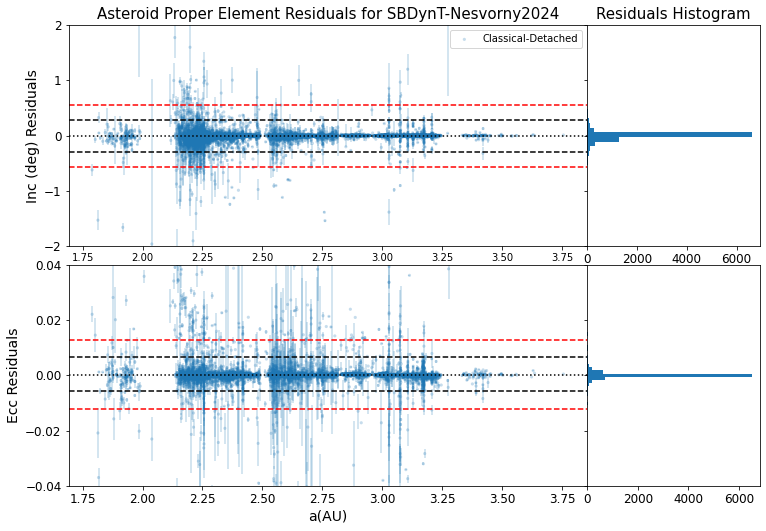

In [66]:
astdys = pd.read_csv('../data_files/NesvornyAst.csv')
TNOs = pd.read_csv('../results/NesvornyAst_prop_elem.csv')
#astdys = pd.read_csv('../data_files/NesvornyAsthalf1.csv')
#TNOs = pd.read_csv('../results/NesvornyAsthalf1_prop_elem_multi_inv.csv')
#TNOs = pd.read_csv('../results/NesvornyAsthalf1_prop_elem_multi_1e8.csv')

#astdys=pd.read_csv('../data_files/Asteroids.csv')
#TNOs = pd.read_csv('../results/Asteroids_prop_elem_multi_pqfilt.csv')

ind1 = np.where(TNOs['PropEcc'] != 0)[0]
ind2 = np.where(TNOs['PropEcc'] < 1)[0]
ind3 = np.where(TNOs['PropSMA'] > 1.8)[0]
ind4 = np.where(TNOs['PropSMA'] < 5.5)[0]

ind = np.intersect1d(ind1,ind2)
ind = np.intersect1d(ind,ind3)
ind = np.intersect1d(ind,ind4)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

fig = plt.figure(figsize=(12,8))
#fig.subplots_adjust(hspace=0)
gs = fig.add_gridspec(2, 2,  width_ratios=(3, 1), height_ratios=(1, 1),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0, hspace=0.085)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0],sharex=ax1)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='x', labelsize=12)
ax1.set_title('Asteroid Proper Element Residuals for SBDynT-Nesvorny2024',fontsize=15)

aste = TNOs['PropEcc']

alp = 0.25
ax1.scatter(astdys['sma'][ind], np.arcsin(TNOs['PropSin(Inc)']-astdys['sini'])[ind]/np.pi*180,s=10,c=colors[0],label='Classical-Detached',alpha=alp,edgecolor='None')
ax1.errorbar(astdys['sma'][ind],np.arcsin(TNOs['PropSin(Inc)']-astdys['sini'])[ind]/np.pi*180,yerr=np.arcsin(astdys['rms_sini'][ind])/np.pi*180,ls="None",c=colors[0],alpha=alp)
num=1212
ax2.scatter(astdys['sma'][ind],(aste-astdys['e'])[ind],s=10,c=colors[0],alpha=alp,edgecolor='None')
#ax2.scatter(astdys['sma'][ind_s],(aste-astdys['e'])[ind_s],s=20,c=colors[4])
#ax2.scatter(astdys['sma'][num],(aste-astdys['e'])[num],s=100,c=colors[4])
#ax1.scatter(astdys['sma'][num],(TNOs['PropSin(Inc)']-astdys['sini'])[num],s=100,c=colors[4])
ax2.errorbar(astdys['sma'][ind],(aste-astdys['e'])[ind],yerr=astdys['rms_e'][ind],ls="None",c=colors[0],alpha=alp)

ax_histy2 = fig.add_subplot(gs[0, 1], sharey=ax1)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax2)

ax_histy2.set_title('Residuals Histogram',fontsize=15)
#ax_histy2.hist((astdys['PropSin(Inc)']-astdys['sinI_x'])[ind],orientation='horizontal',bins=41)
#ax_histy.hist((astdys['PropEcc']-astdys['e_x'])[ind],orientation='horizontal',bins=41)
ax_histy2.hist(np.arcsin(TNOs['PropSin(Inc)']-astdys['sini'])[ind]/np.pi*180,orientation='horizontal',bins=241)
ax_histy.hist((TNOs['PropEcc']-astdys['e'])[ind],orientation='horizontal',bins=241)

ax1.legend()

plt.setp(ax_histy2.get_yticklabels(),visible=False)
plt.setp(ax_histy.get_yticklabels(),visible=False)
ax_histy2.tick_params(axis='x', labelsize=12)
ax_histy.tick_params(axis='x', labelsize=12)

sini_2sig = np.average(((np.arcsin(TNOs['PropSin(Inc)']-astdys['sini'])[ind])/np.pi*180)**2, weights=np.arcsin(astdys['rms_sini'][ind])/np.pi*180)
e_2sig = np.average((TNOs['PropEcc']-astdys['e'])[ind]**2, weights=astdys['rms_e'][ind])
print(e_2sig/2,sini_2sig/2)

sini_2sig = (np.arcsin(TNOs['PropSin(Inc)']-astdys['sini'])[ind]/np.pi*180).std()*2
e_2sig = (TNOs['PropEcc']-astdys['e'])[ind].std()*2
print(e_2sig/2,sini_2sig/2)

sini_2sig1 = (np.arcsin(TNOs['PropSin(Inc)']-astdys['sini'])[ind]/np.pi*180).std()*2

sini_2sig1 = ((np.arcsin(TNOs['PropSin(Inc)']-astdys['sini'])/astdys['rms_sini'])[ind]/np.pi*180).std()*2
e_2sig1 = ((TNOs['PropEcc']-astdys['e'])/astdys['rms_e'])[ind].std()*2
print(e_2sig1/2,sini_2sig1/2)

mean_sini = np.mean(np.arcsin(TNOs['PropSin(Inc)']-astdys['sini'])[ind]/np.pi*180)
mean_e = np.mean((TNOs['PropEcc']-astdys['e'])[ind])


ax1.axhline(y = sini_2sig+mean_sini, color = 'r', linestyle = 'dashed')
ax1.axhline(y = -sini_2sig+mean_sini, color = 'r', linestyle = 'dashed') 

ax2.axhline(y = e_2sig+mean_e, color = 'r', linestyle = 'dashed')
ax2.axhline(y = -e_2sig+mean_e, color = 'r', linestyle = 'dashed') 

ax1.axhline(y = sini_2sig/2+mean_sini, color = 'k', linestyle = 'dashed')
ax1.axhline(y = -sini_2sig/2+mean_sini, color = 'k', linestyle = 'dashed') 

ax2.axhline(y = e_2sig/2+mean_e, color = 'k', linestyle = 'dashed')
ax2.axhline(y = -e_2sig/2+mean_e, color = 'k', linestyle = 'dashed') 


ax1.axhline(y = 0, color = 'k', linestyle = 'dotted') 
ax2.axhline(y = 0, color = 'k', linestyle = 'dotted') 

ax2.set_xlabel('a(AU)',fontsize=14)
ax1.set_ylabel('Inc (deg) Residuals',fontsize=14)
ax2.set_ylabel('Ecc Residuals',fontsize=14)
#ax1.set_xlim(29,61)
#ax1.set_ylim(-6,7)
ax2.set_ylim(-0.001,0.001)
#ax1.set_ylim(-0.001,0.001)
ax2.set_ylim(-0.04,0.04)
ax1.set_ylim(-1.75,1.75)

#ax2.set_ylim(-e_2sig*3,e_2sig*3)
#ax1.set_ylim(-sini_2sig*3,sini_2sig*3)

ax1.set_yticks(ax1.get_yticks()[::2])
ax2.set_yticks(ax2.get_yticks()[::2])
#plt.setp(ax1.get_xticklabels(), visible=False)
#plt.setp(ax_histy2.get_xticklabels(), visible=False)
#ax[1].title('SBDynT\'s Proper Sin(Inclination)')
plt.savefig('residuals_nesvorny.png')
plt.show()


